# **Tiền xử lý dữ liệu**

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import pickle

In [ ]:
# Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nhanna1219/Closely_Customer_Classification/main/Preprocessed_Data.csv', sep=',')
print("Number of datapoints:", len(df))
df.head()

Number of datapoints: 2213


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Loyalty_Score,Is_Loyal
0,5.368107,-1.804778,-1.078759,-0.646435,-3.097021,0.337949,0.007753,0.821314,-0.411286,0.355576,...,0.493904,0.814431,-0.774570,0.656888,0.502650,0.688828,-1.420569,0.749187,0.405501,True
1,-3.491633,0.502507,-0.427520,-0.183056,0.859958,-0.916708,2.148626,0.386522,-0.610815,1.025348,...,0.453972,-0.146679,0.185969,0.007899,-0.298426,-0.227511,-0.257056,0.167572,0.190314,False
2,2.018019,-1.291695,-1.182698,-1.128659,0.603602,-0.583301,-0.137928,-0.128718,-0.429963,0.473263,...,-1.240771,0.170181,-0.554964,-0.661380,0.382996,0.297692,0.214487,-0.410894,0.380150,True
3,-3.286131,0.555640,-0.593547,-0.890906,0.937647,0.370995,-0.325239,0.343596,-0.994986,-0.007917,...,-0.242170,0.251216,-0.071301,-0.027513,0.068979,0.056725,-0.360599,-0.198887,0.234560,False
4,-0.585539,-1.463671,0.526403,2.031741,0.218226,0.454320,-0.106105,-0.749205,0.098400,-0.308995,...,0.156086,0.973668,-0.445877,0.238192,0.781415,-0.038416,-0.242535,-0.114447,0.161950,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PC1            2213 non-null   float64
 1   PC2            2213 non-null   float64
 2   PC3            2213 non-null   float64
 3   PC4            2213 non-null   float64
 4   PC5            2213 non-null   float64
 5   PC6            2213 non-null   float64
 6   PC7            2213 non-null   float64
 7   PC8            2213 non-null   float64
 8   PC9            2213 non-null   float64
 9   PC10           2213 non-null   float64
 10  PC11           2213 non-null   float64
 11  PC12           2213 non-null   float64
 12  PC13           2213 non-null   float64
 13  PC14           2213 non-null   float64
 14  PC15           2213 non-null   float64
 15  PC16           2213 non-null   float64
 16  PC17           2213 non-null   float64
 17  PC18           2213 non-null   float64
 18  PC19    

In [ ]:
# Change "True" "False" label to 1, 0 respectively
df['Is_Loyal'] = df['Is_Loyal'].astype(int)

# Splitting the dataset into features and target variable
X = df.drop(['Loyalty_Score','Is_Loyal'], axis=1)
y = df['Is_Loyal']

# **Chia Train:Test:Validate theo tỷ lệ 7:2:1**

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

with open('svm_model-7:2:1.pickle', 'wb') as file:
    # Sử dụng pickle.dump để lưu mô hình vào tệp
    pickle.dump(svm_model, file)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9751693002257337
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       227
           1       0.98      0.97      0.97       216

    accuracy                           0.98       443
   macro avg       0.98      0.97      0.98       443
weighted avg       0.98      0.98      0.98       443



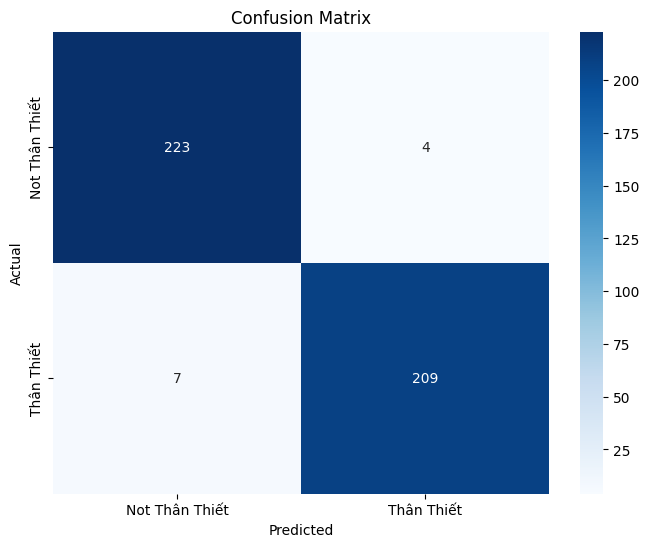


Validation Set:
Accuracy: 0.9864253393665159
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.99      0.98      0.99       113

    accuracy                           0.99       221
   macro avg       0.99      0.99      0.99       221
weighted avg       0.99      0.99      0.99       221



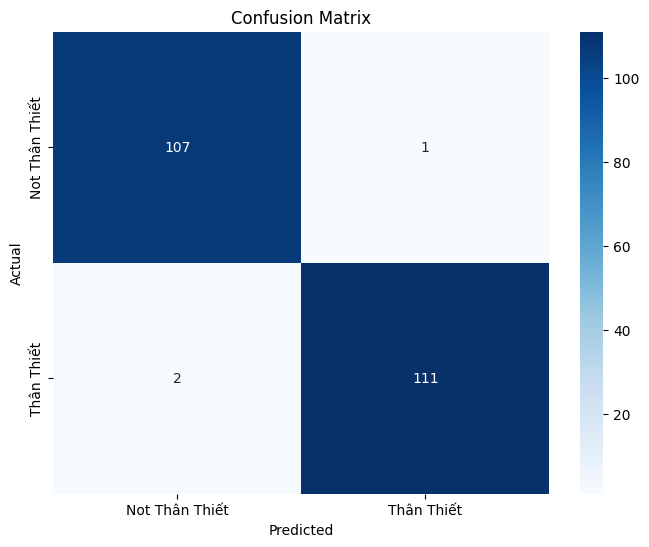

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# # Concatenate predictions and true labels for test and validation sets
# y_combined = np.concatenate([y_test, y_validate])
# y_pred_combined = np.concatenate([svm_model.predict(X_test_scaled), y_pred_validate])

# # Evaluate the combined set
# accuracy_combined = accuracy_score(y_combined, y_pred_combined)
# report_combined = classification_report(y_combined, y_pred_combined)
# cm_combined = confusion_matrix(y_combined, y_pred_combined)

# # Print results for the combined set
# print('\nCombined Set (Test + Validation):')
# print(f'Accuracy: {accuracy_combined}')
# print('Classification Report:\n', report_combined)

# # Vẽ Confusion Matrix Combined
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
# plt.title('Confusion Matrix (Combined Set)')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='poly', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC(kernel='poly')

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.8826185101580135
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       227
           1       0.97      0.78      0.87       216

    accuracy                           0.88       443
   macro avg       0.90      0.88      0.88       443
weighted avg       0.90      0.88      0.88       443



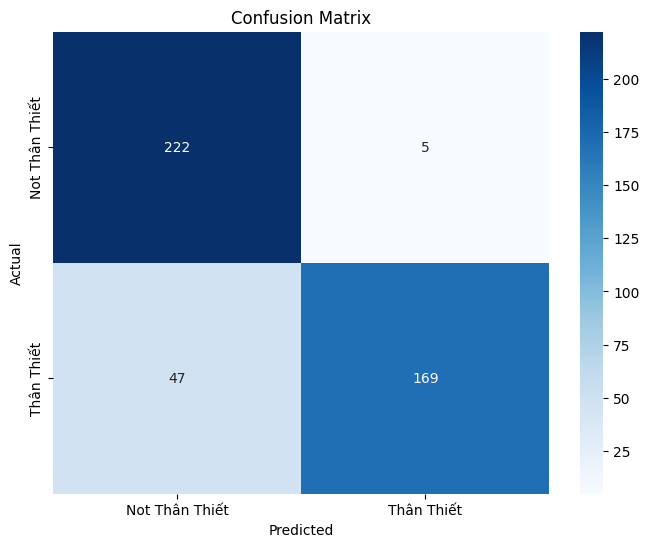


Validation Set:
Accuracy: 0.8914027149321267
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       108
           1       0.98      0.81      0.88       113

    accuracy                           0.89       221
   macro avg       0.90      0.89      0.89       221
weighted avg       0.91      0.89      0.89       221



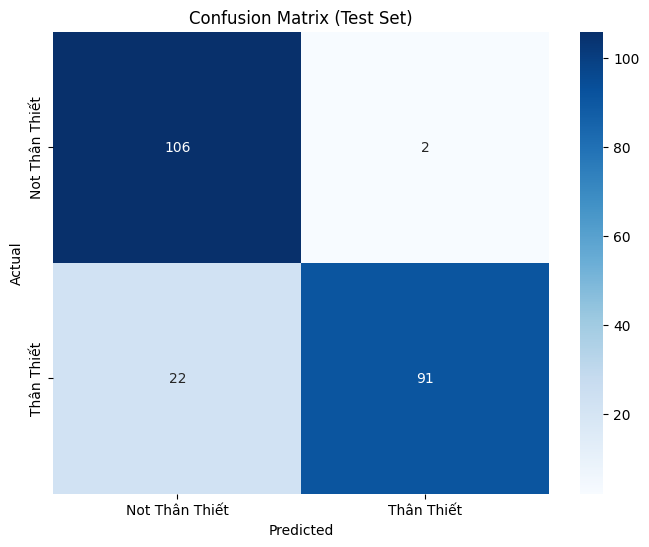

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC()

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9435665914221218
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       227
           1       0.93      0.96      0.94       216

    accuracy                           0.94       443
   macro avg       0.94      0.94      0.94       443
weighted avg       0.94      0.94      0.94       443



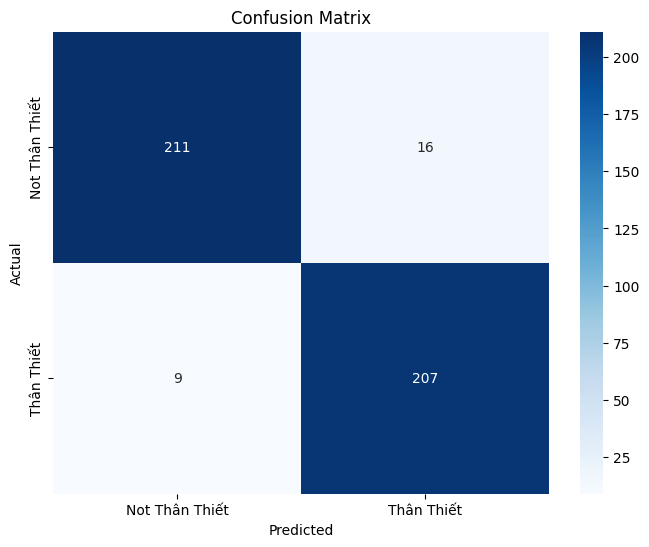


Validation Set:
Accuracy: 0.9638009049773756
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.96      0.97      0.96       113

    accuracy                           0.96       221
   macro avg       0.96      0.96      0.96       221
weighted avg       0.96      0.96      0.96       221



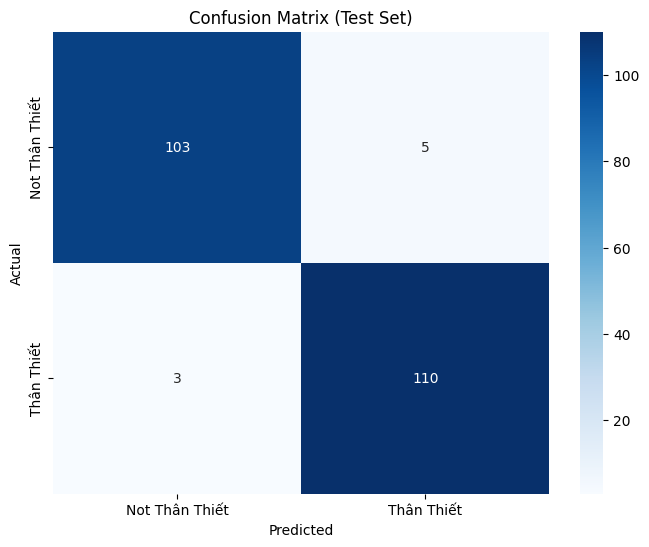

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='sigmoid', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC(kernel='sigmoid')

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9322799097065463
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       227
           1       0.94      0.92      0.93       216

    accuracy                           0.93       443
   macro avg       0.93      0.93      0.93       443
weighted avg       0.93      0.93      0.93       443



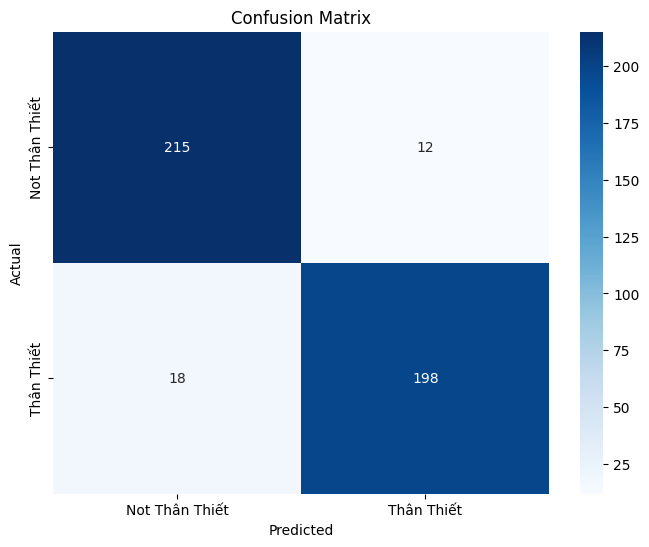


Validation Set:
Accuracy: 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       108
           1       0.95      0.93      0.94       113

    accuracy                           0.94       221
   macro avg       0.94      0.94      0.94       221
weighted avg       0.94      0.94      0.94       221



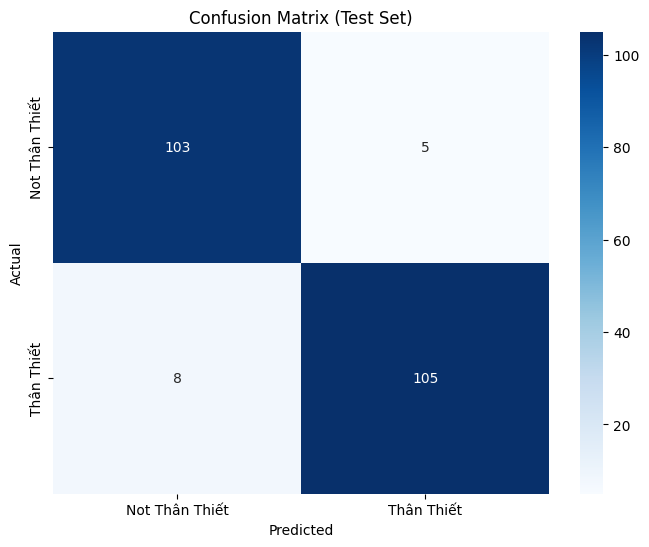

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Chia Train:Test:Validate theo tỷ lệ 8:1:1**

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=1/2, random_state=42)

# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validate_scaled = scaler.transform(X_validate)

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

with open('svm_model.pickle', 'wb') as file:
    # Sử dụng pickle.dump để lưu mô hình vào tệp
    pickle.dump(svm_model, file)

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9864864864864865
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       110
           1       0.99      0.98      0.99       112

    accuracy                           0.99       222
   macro avg       0.99      0.99      0.99       222
weighted avg       0.99      0.99      0.99       222



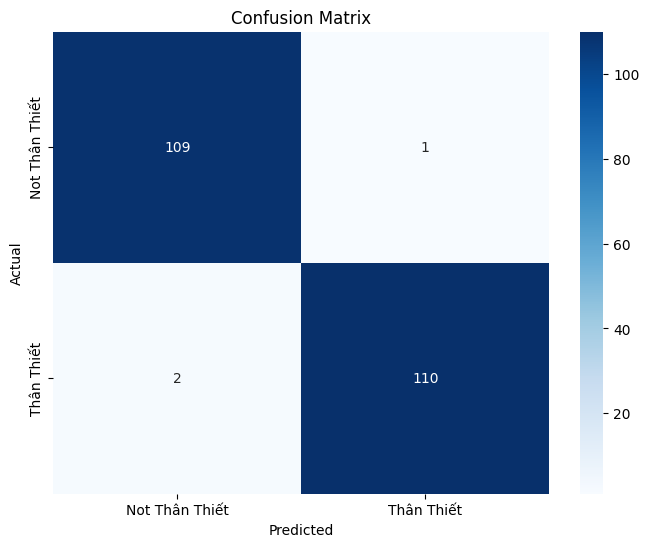


Validation Set:
Accuracy: 0.9773755656108597
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       118
           1       0.96      0.99      0.98       103

    accuracy                           0.98       221
   macro avg       0.98      0.98      0.98       221
weighted avg       0.98      0.98      0.98       221



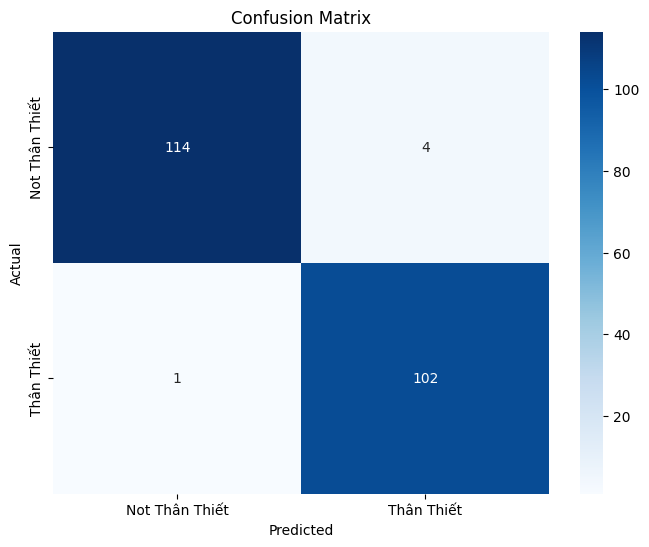

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='poly', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC(kernel='poly')

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9054054054054054
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       110
           1       0.97      0.84      0.90       112

    accuracy                           0.91       222
   macro avg       0.91      0.91      0.91       222
weighted avg       0.91      0.91      0.91       222



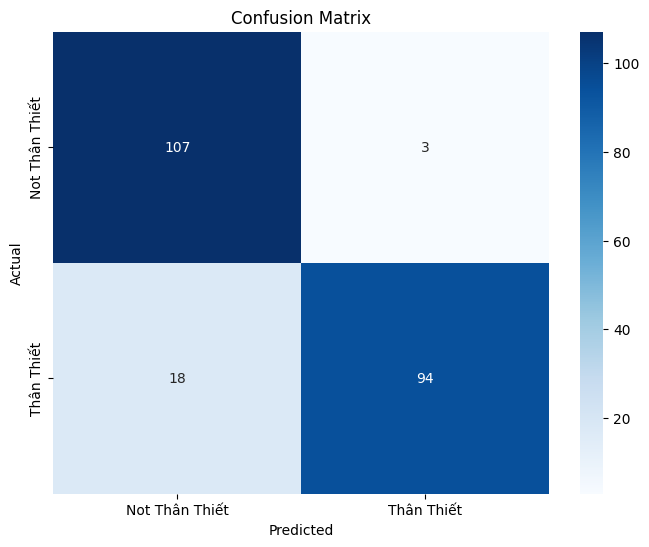


Validation Set:
Accuracy: 0.9140271493212669
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       118
           1       0.98      0.83      0.90       103

    accuracy                           0.91       221
   macro avg       0.92      0.91      0.91       221
weighted avg       0.92      0.91      0.91       221



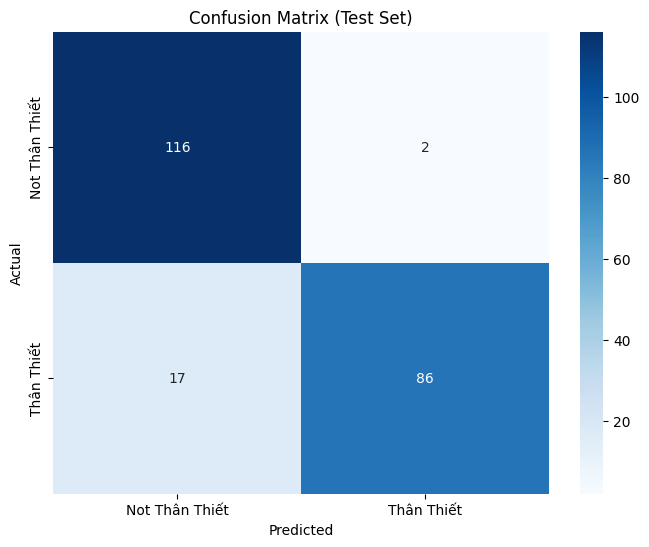

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC()

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9594594594594594
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       110
           1       0.96      0.96      0.96       112

    accuracy                           0.96       222
   macro avg       0.96      0.96      0.96       222
weighted avg       0.96      0.96      0.96       222



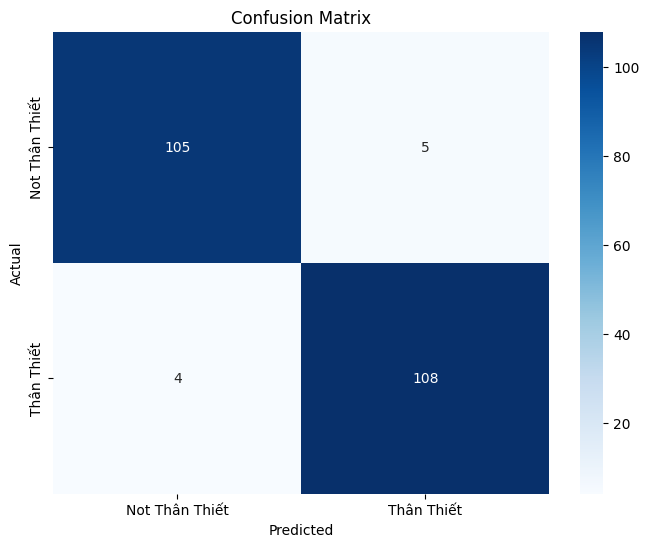


Validation Set:
Accuracy: 0.9547511312217195
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       118
           1       0.93      0.98      0.95       103

    accuracy                           0.95       221
   macro avg       0.95      0.96      0.95       221
weighted avg       0.96      0.95      0.95       221



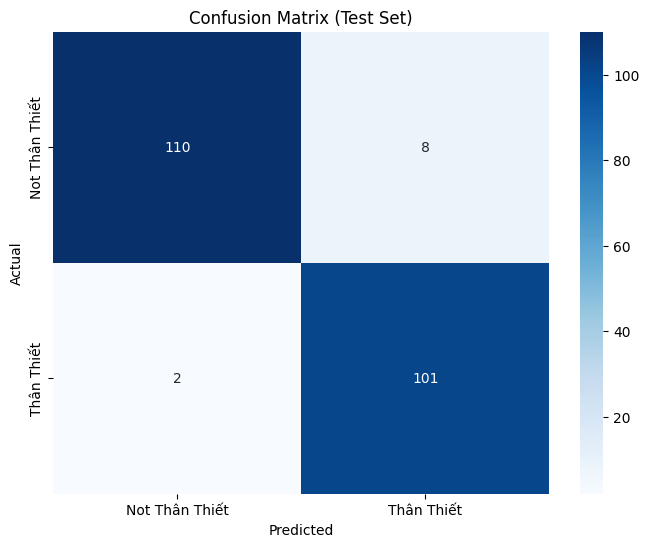

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train an SVM model
#The 'kernel' parameter of SVC must be a str among {'precomputed', 'linear', 'poly', 'rbf', 'sigmoid'
svm_model = SVC(kernel='sigmoid', C=1.0)
svm_model.fit(X_train_scaled, y_train)
svm_model

SVC(kernel='sigmoid')

In [ ]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_validate = svm_model.predict(X_validate_scaled)


Test Set:
Accuracy: 0.9414414414414415
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       110
           1       0.96      0.92      0.94       112

    accuracy                           0.94       222
   macro avg       0.94      0.94      0.94       222
weighted avg       0.94      0.94      0.94       222



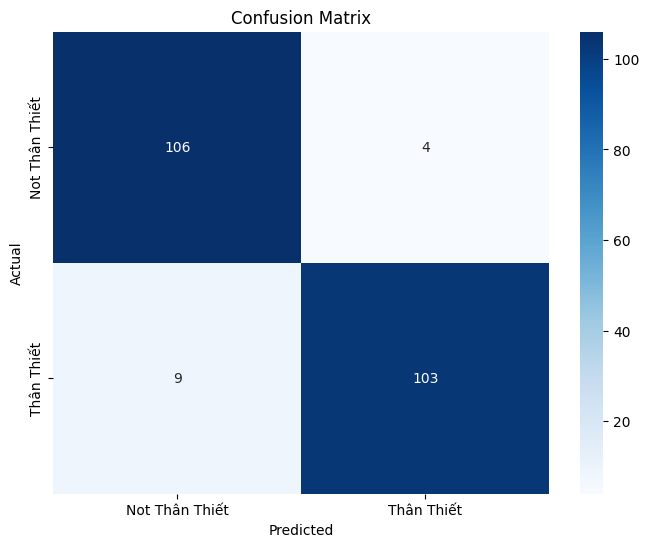


Validation Set:
Accuracy: 0.9457013574660633
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       118
           1       0.93      0.95      0.94       103

    accuracy                           0.95       221
   macro avg       0.95      0.95      0.95       221
weighted avg       0.95      0.95      0.95       221



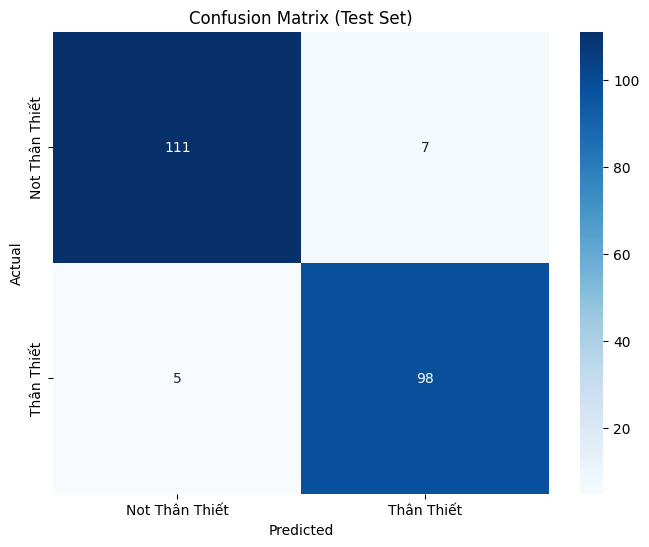

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy_validate = accuracy_score(y_validate, y_pred_validate)
report_validate = classification_report(y_validate, y_pred_validate)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_validate = confusion_matrix(y_validate, y_pred_validate)

print('\nTest Set:')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

# Vẽ Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\nValidation Set:')
print(f'Accuracy: {accuracy_validate}')
print('Classification Report:\n', report_validate)

# Vẽ Confusion Matrix Validate
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validate, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Thân Thiết', 'Thân Thiết'], yticklabels=['Not Thân Thiết', 'Thân Thiết'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **=> Kết luận: kernel là linear sẽ cho kết quả chính xác nhất**